In [5]:
using Plots,ApproxFun,Interact,Reactive; 
gr();

# Advection-diffusion with Dirichlet  $$u_t = 0.01 \Delta u -4 u_x -3 u_y$$ $$u(\pm 1,y,t)=u(x,\pm 1,t)=0$$

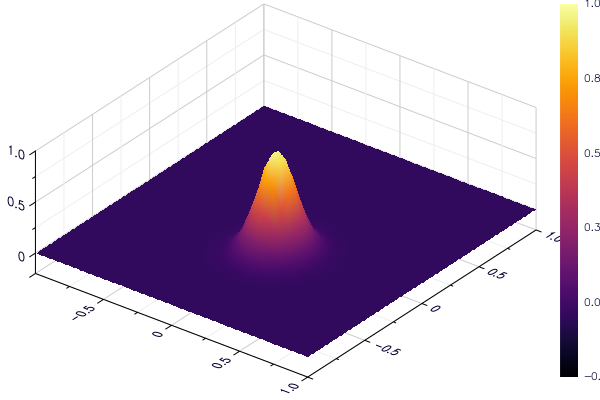

In [9]:
d=Interval()^2
u0   = ProductFun((x,y)->exp(-40(x-.1)^2-40(y+.2)^2),d)
B=dirichlet(d);D=Derivative(Interval())
L=(0.01D^2-4D)⊗I + I⊗(0.01D^2-3D)

glp=Signal(u0);map(f->surface(f;nlevels=20,xlims=(-1.,1.),ylims=(-1.,1.)),glp)

In [10]:
u0=BDF4(B,L,u0,0.002,150,glp);

# Wave equation with Dirichlet  $$u_{tt} = \Delta u$$ $$u(x,y,0)=u_0(x,y), u(\pm 1,y,t)=u(x,\pm 1,t)=0$$

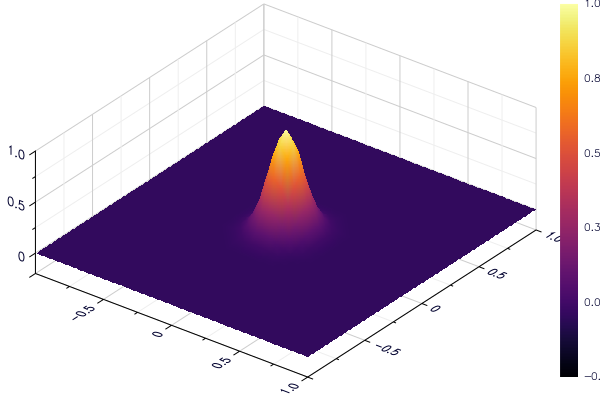

In [11]:
d=Interval()^2
# initial condition
u0   = ProductFun((x,y)->exp(-50x^2-50y^2),d)
B= dirichlet(d);Δ=Laplacian(d);
glp=Signal(u0);map(f->surface(f,nlevels=20,xlims=(-1.,1.),ylims=(-1.,1.)),glp)

In [12]:
u0=BDF22(B,Δ,u0,0.004,200,glp);

# Sine Gordon $$u_{tt}=\Delta u - \sin(u)$$

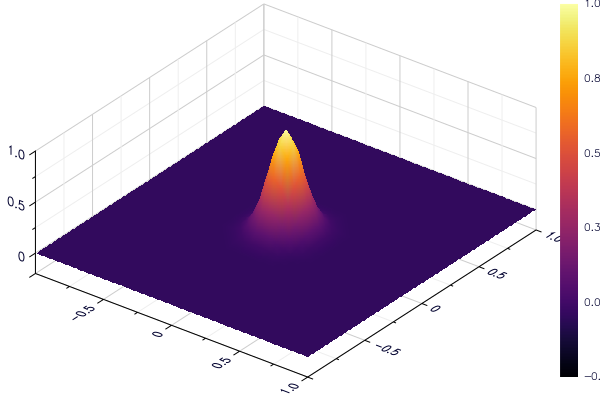

In [14]:
d=Interval()^2
u0   = ProductFun((x,y)->exp(-50x^2-50y^2),d)
B= dirichlet(d);L=Laplacian(d)-I;g(u)=u-sin(u)

glp=Signal(u0);map(u->surface(u;xlims=(-1.,1.),ylims=(-1.,1.)),glp)

In [15]:
u0=BDF22(B,L,g,u0,0.004,300,glp);